In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA



In [20]:
df = pd.read_csv("data/raw/Media-Matrix-Combined-v3.csv")
print(df.shape)

(62, 28)


In [21]:
# set index to compound names
df.set_index(df.columns[0], inplace=True)

In [22]:
# filter rows that were considered not important
df_filtered = df.drop(['Dipotassium phosphate', 'Disodium edta dihydrate', 'EDTA', 'Monopotassium phosphate',
                       'Phosphoric acid', 'Potassium hydroxide', 'Sodium citrate dihydrate', 'Sodium phosphate',
                       'Sulphuric acid', 'Uracil'], axis=0)

print(df_filtered.shape)

(52, 27)


In [23]:
#removes pubchemid column
print (f"column to be dropped {df_filtered.columns[1]}")
print (f"column to be dropped {df.columns[1]}")
# remove pubchemid column
df_filtered = df_filtered.drop(df_filtered.columns[1], axis=1)
df = df.drop(df.columns[1], axis=1)

column to be dropped PubChemCID
column to be dropped PubChemCID


In [24]:
#print(df_filtered.head())

In [25]:
print(df_filtered.describe())
print(df_filtered.columns)

              1_YAR     2a_YAR     2b_YAR     2c_YAR     2d_YAR     3a_YAR  \
count  5.200000e+01  52.000000  52.000000  52.000000  52.000000  52.000000   
mean   3.192877e-01   0.491002   0.491002   0.971772   0.491002   0.437521   
std    1.491324e+00   2.844720   2.844720   6.264035   2.042269   2.780634   
min    0.000000e+00   0.000000   0.000000   0.000000   0.000000   0.000000   
25%    0.000000e+00   0.000000   0.000000   0.000000   0.000000   0.000000   
50%    0.000000e+00   0.000000   0.000000   0.000000   0.000000   0.000000   
75%    2.500000e-07   0.000425   0.000425   0.000425   0.000500   0.000005   
max    1.000000e+01  20.000000  20.000000  45.000000  10.000000  20.000000   

          3b_YAR     3c_YAR      4_YAR      5_YAR  ...     5b_CER     1a_PIC  \
count  52.000000  52.000000  52.000000  52.000000  ...  52.000000  52.000000   
mean    0.481092   0.705361   1.645381   0.939925  ...   1.484457   0.483299   
std     2.817887   3.023644  11.100673   5.633760  ...   

In [26]:
#annotation col is important for plot labels, but removed here for numerical analysis
# create a separate DataFrame for the annotation column
annotate_col = df_filtered[['Annotate']]
# drop the annotation column from the main DataFrame
full_df = df_filtered.drop(['Annotate'], axis=1)

In [27]:
# log transform the data (adding a small pseudocount to avoid log(0))

pseudocount = 1e-10
df_log = np.log10(full_df.replace(0, pseudocount))

#df_log = np.log10(full_df)

In [28]:
yar_df = df_log.filter(like='_YAR')
cer_df = df_log.filter(like='_CER')
pic_df = df_log.filter(like='_PIC')


In [29]:
# these are the created dataframes

print(df_filtered.shape) # raw data with annotation
print(full_df.shape) # full data without annotation
print(df_log.shape) # log-transformed data
print(annotate_col.shape) # annotation column only
print(yar_df.shape) # YAR data
print(cer_df.shape) # CER data
print(pic_df.shape) # PIC data

(52, 26)
(52, 25)
(52, 25)
(52, 1)
(52, 10)
(52, 6)
(52, 9)


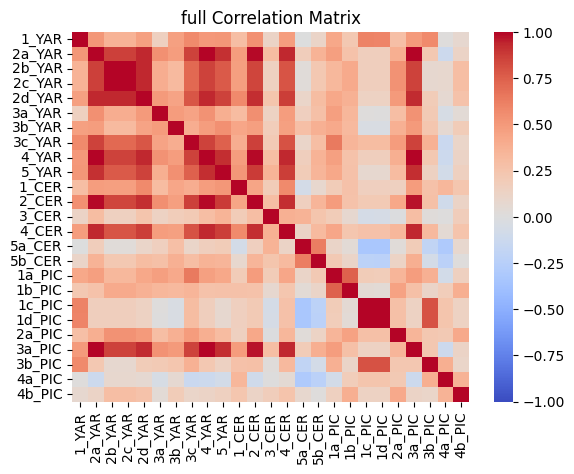

In [30]:
sns.heatmap(df_log.corr(method='spearman'), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("full Correlation Matrix")
plt.show()

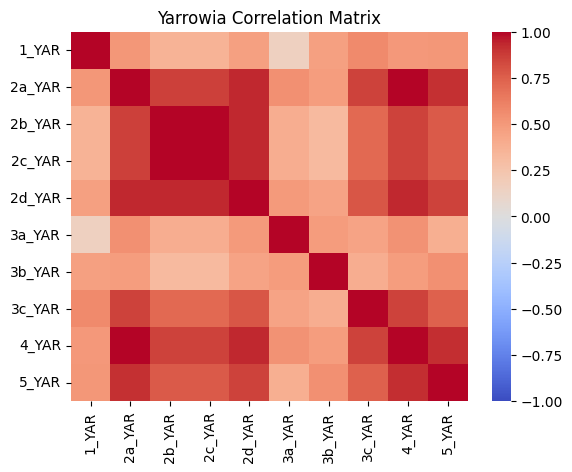

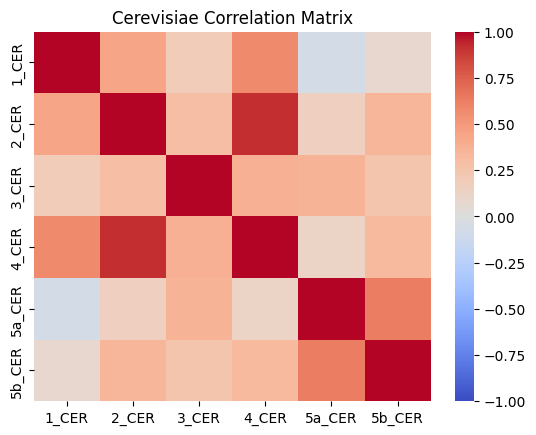

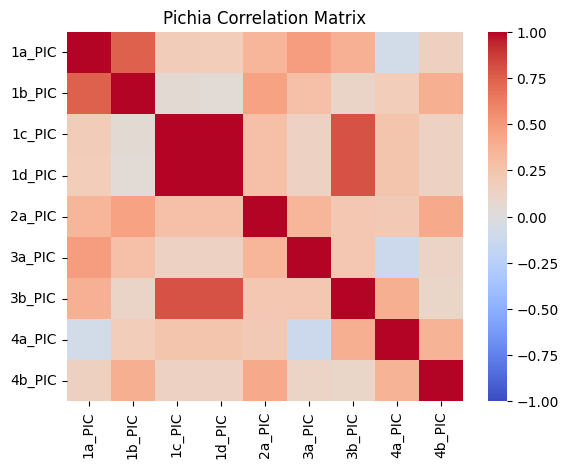

In [31]:
sns.heatmap(yar_df.corr(method='spearman'), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Yarrowia Correlation Matrix")
plt.show()
sns.heatmap(cer_df.corr(method='spearman'), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Cerevisiae Correlation Matrix")
plt.show()
sns.heatmap(pic_df.corr(method='spearman'), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pichia Correlation Matrix")  
plt.show()

In [32]:
print(yar_df.corr().min().min(), yar_df.corr().max().max())
print(cer_df.corr().min().min(), cer_df.corr().max().max())
print(pic_df.corr().min().min(), pic_df.corr().max().max())

0.19804731703926942 1.0
-0.03887336033331898 1.0
-0.11386582050251125 1.0


In [49]:
print(df_log.max())

1_YAR     1.000000
2a_YAR    1.301030
2b_YAR    1.301030
2c_YAR    1.653213
2d_YAR    1.000000
3a_YAR    1.301030
3b_YAR    1.301030
3c_YAR    1.301030
4_YAR     1.903090
5_YAR     1.602060
1_CER     1.000000
2_CER     1.342423
3_CER     2.000000
4_CER     1.000000
5a_CER    1.397940
5b_CER    1.778151
1a_PIC    1.000000
1b_PIC    1.000000
1c_PIC    1.173186
1d_PIC    0.456366
2a_PIC    1.978637
3a_PIC    1.301030
3b_PIC    2.863323
4a_PIC    1.655138
4b_PIC    1.655138
dtype: float64


In [34]:
df_log_reset = df_log.reset_index() # make compound a column instead of index

df_long = pd.melt(df_log_reset, id_vars='Compound', var_name='Sample', value_name='Log10_Concentration')

print(df_long.head())

                                  Compound Sample  Log10_Concentration
0  Ammonium iron (II) sulphate hexahydrate  1_YAR           -10.000000
1                       Ammonium phosphate  1_YAR           -10.000000
2                        Ammonium sulphate  1_YAR             0.576341
3                                 Arginine  1_YAR           -10.000000
4                            Aspartic acid  1_YAR           -10.000000


In [35]:
# Add an 'Organism' column based on the suffix in 'Sample'
df_long['Organism'] = df_long['Sample'].str.extract(r'_([A-Z]+)$')


In [36]:
filtered_df_long = df_long.replace(-10, np.nan)

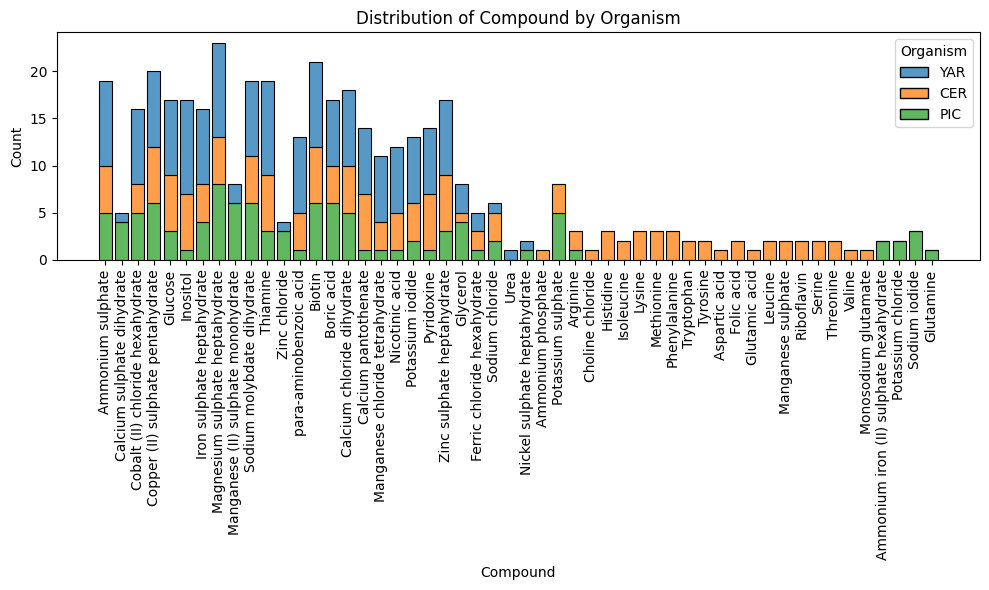

In [44]:


plt.figure(figsize=(10, 6))
sns.histplot(data=df_long[df_long['Log10_Concentration'] > -10],  # remove pseudocount values
             x='Compound', hue='Organism', 
             multiple='stack',  # you could also try 'dodge'
             shrink=0.8)

plt.xticks(rotation=90)
plt.title("Distribution of Compound by Organism")
plt.tight_layout()
plt.show()


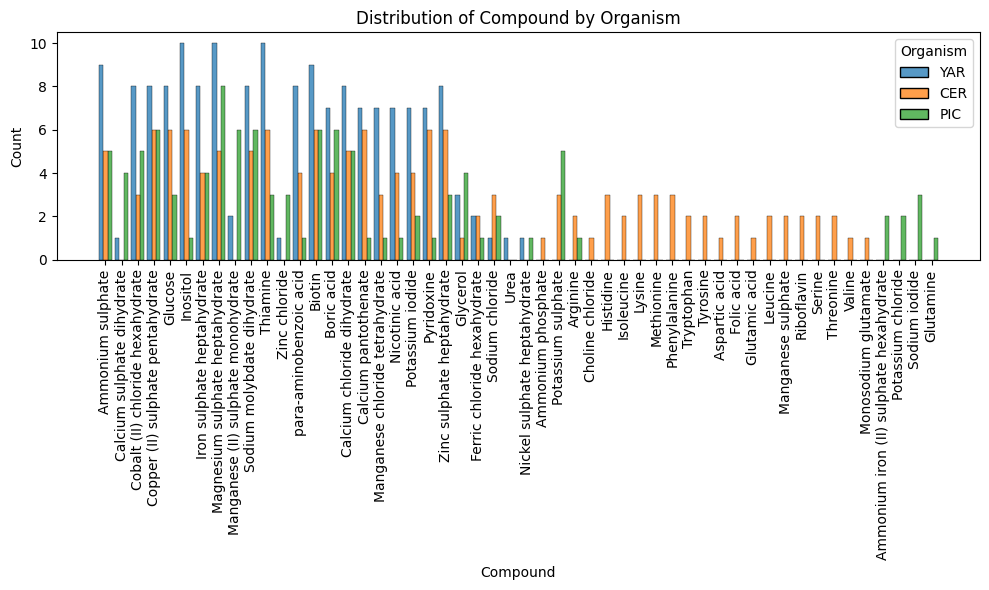

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_long[df_long['Log10_Concentration']> -10],  # remove pseudocount values, 
             x='Compound', hue='Organism', 
             multiple='dodge',  # you could also try 'dodge'
             shrink=0.8)

plt.xticks(rotation=90)
plt.title(" Compound occurence by Organism")
plt.tight_layout()
plt.show()


# normalise to account for difference in number of samples


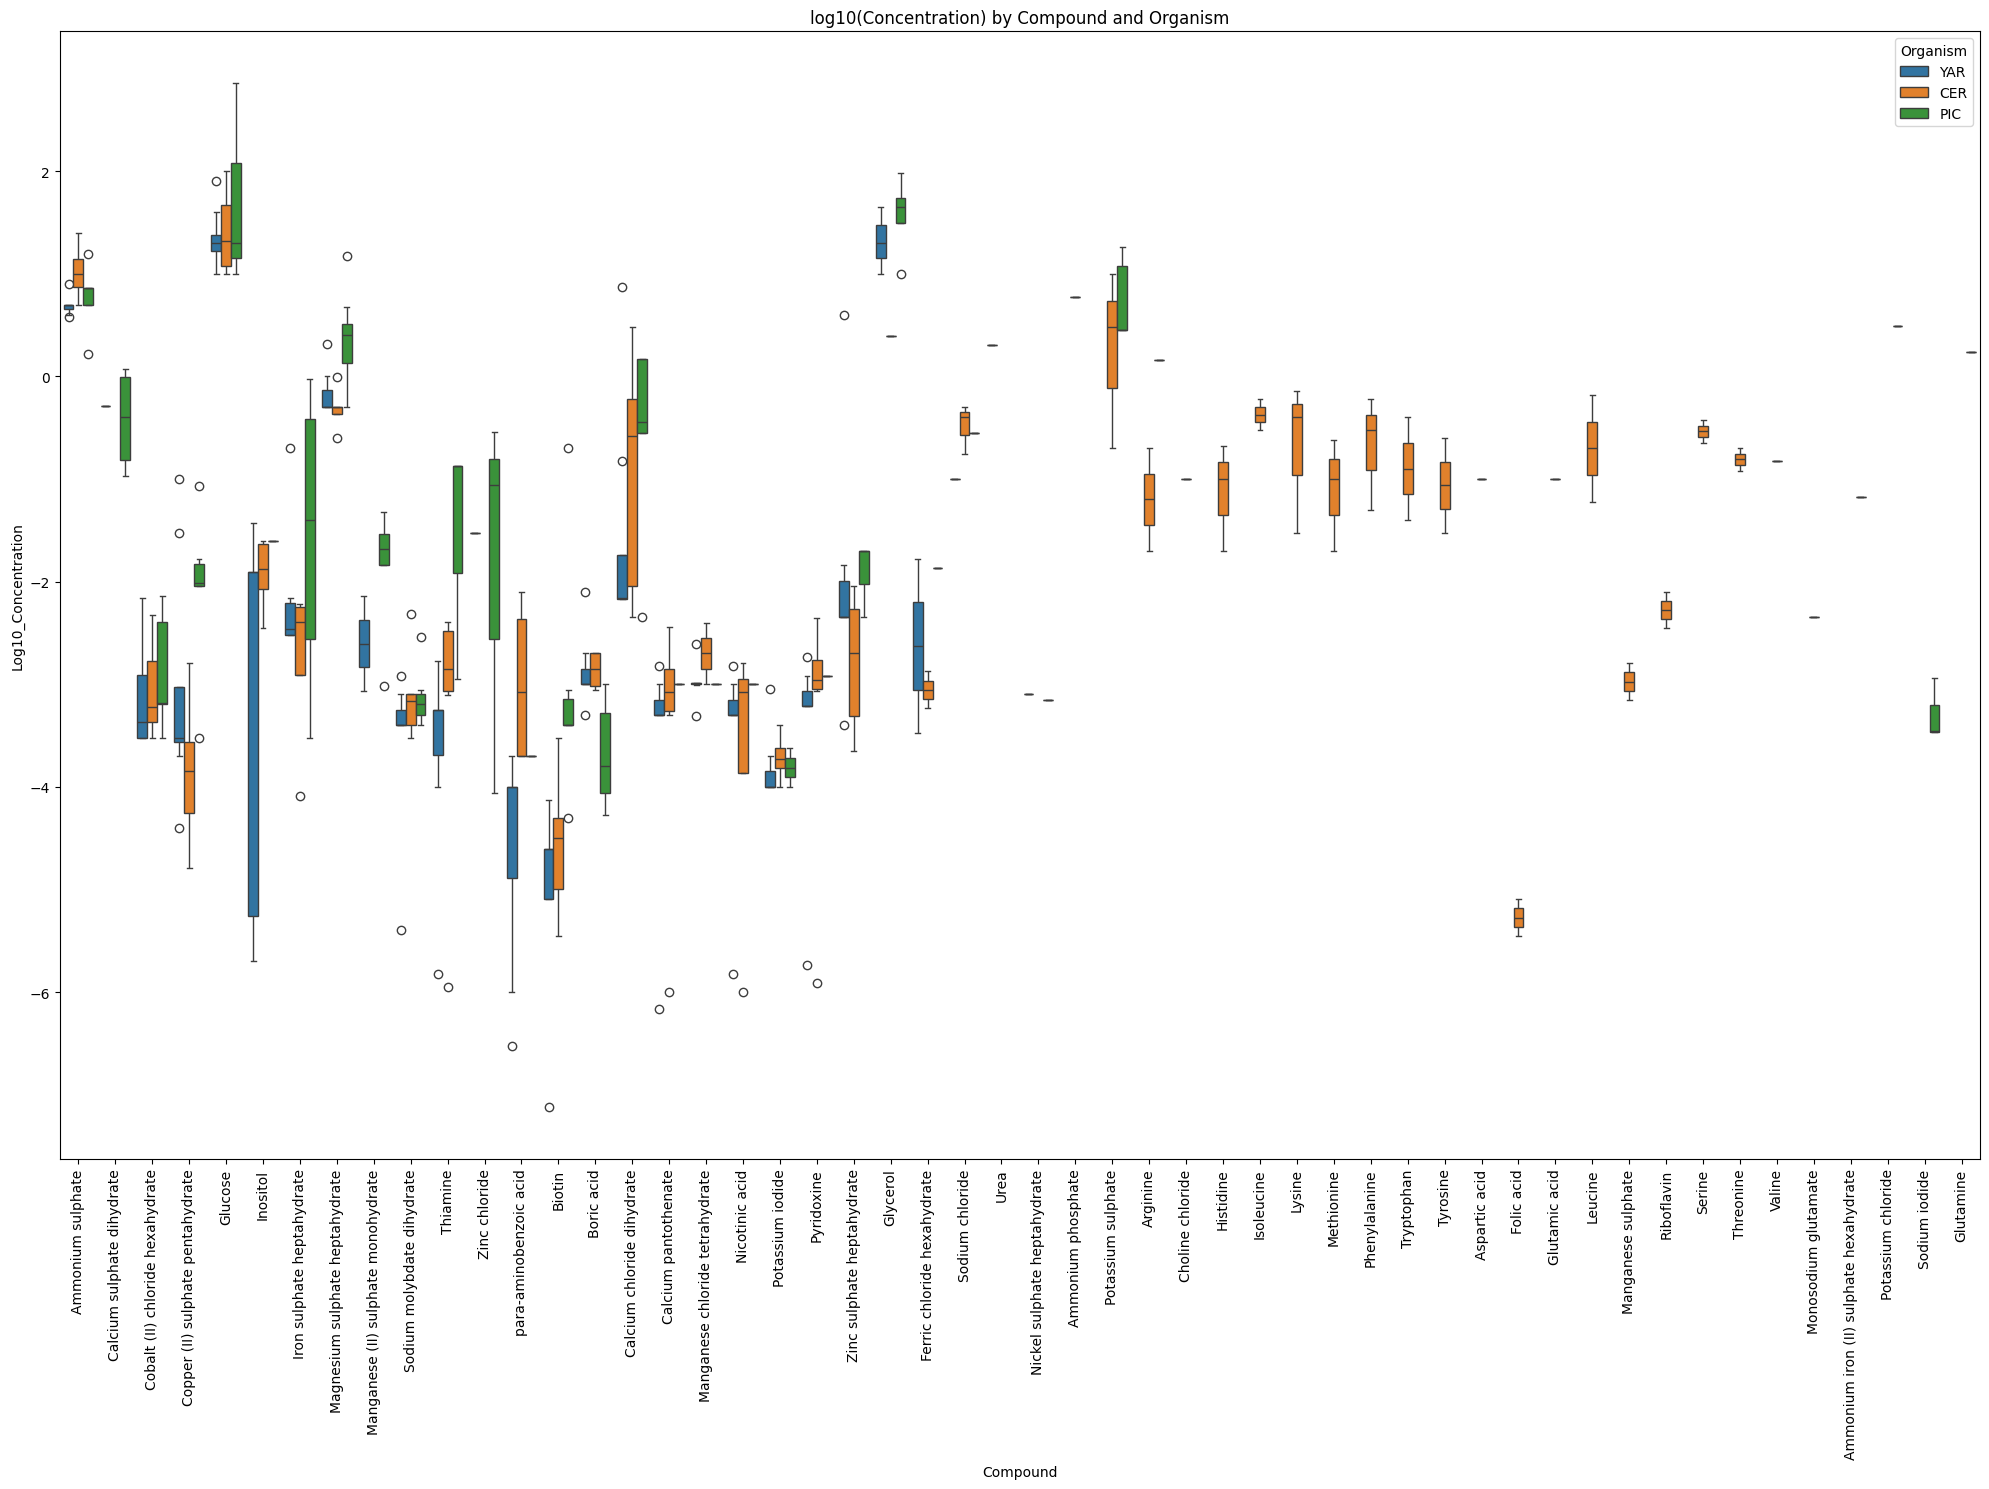

In [52]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df_long[df_long['Log10_Concentration'] > -10],  # exclude pseudocount
            x='Compound', y='Log10_Concentration', hue='Organism')
plt.xticks(rotation=90)
plt.title('log10(Concentration) by Compound and Organism')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'log10(Concentration) by Compound and Organism')

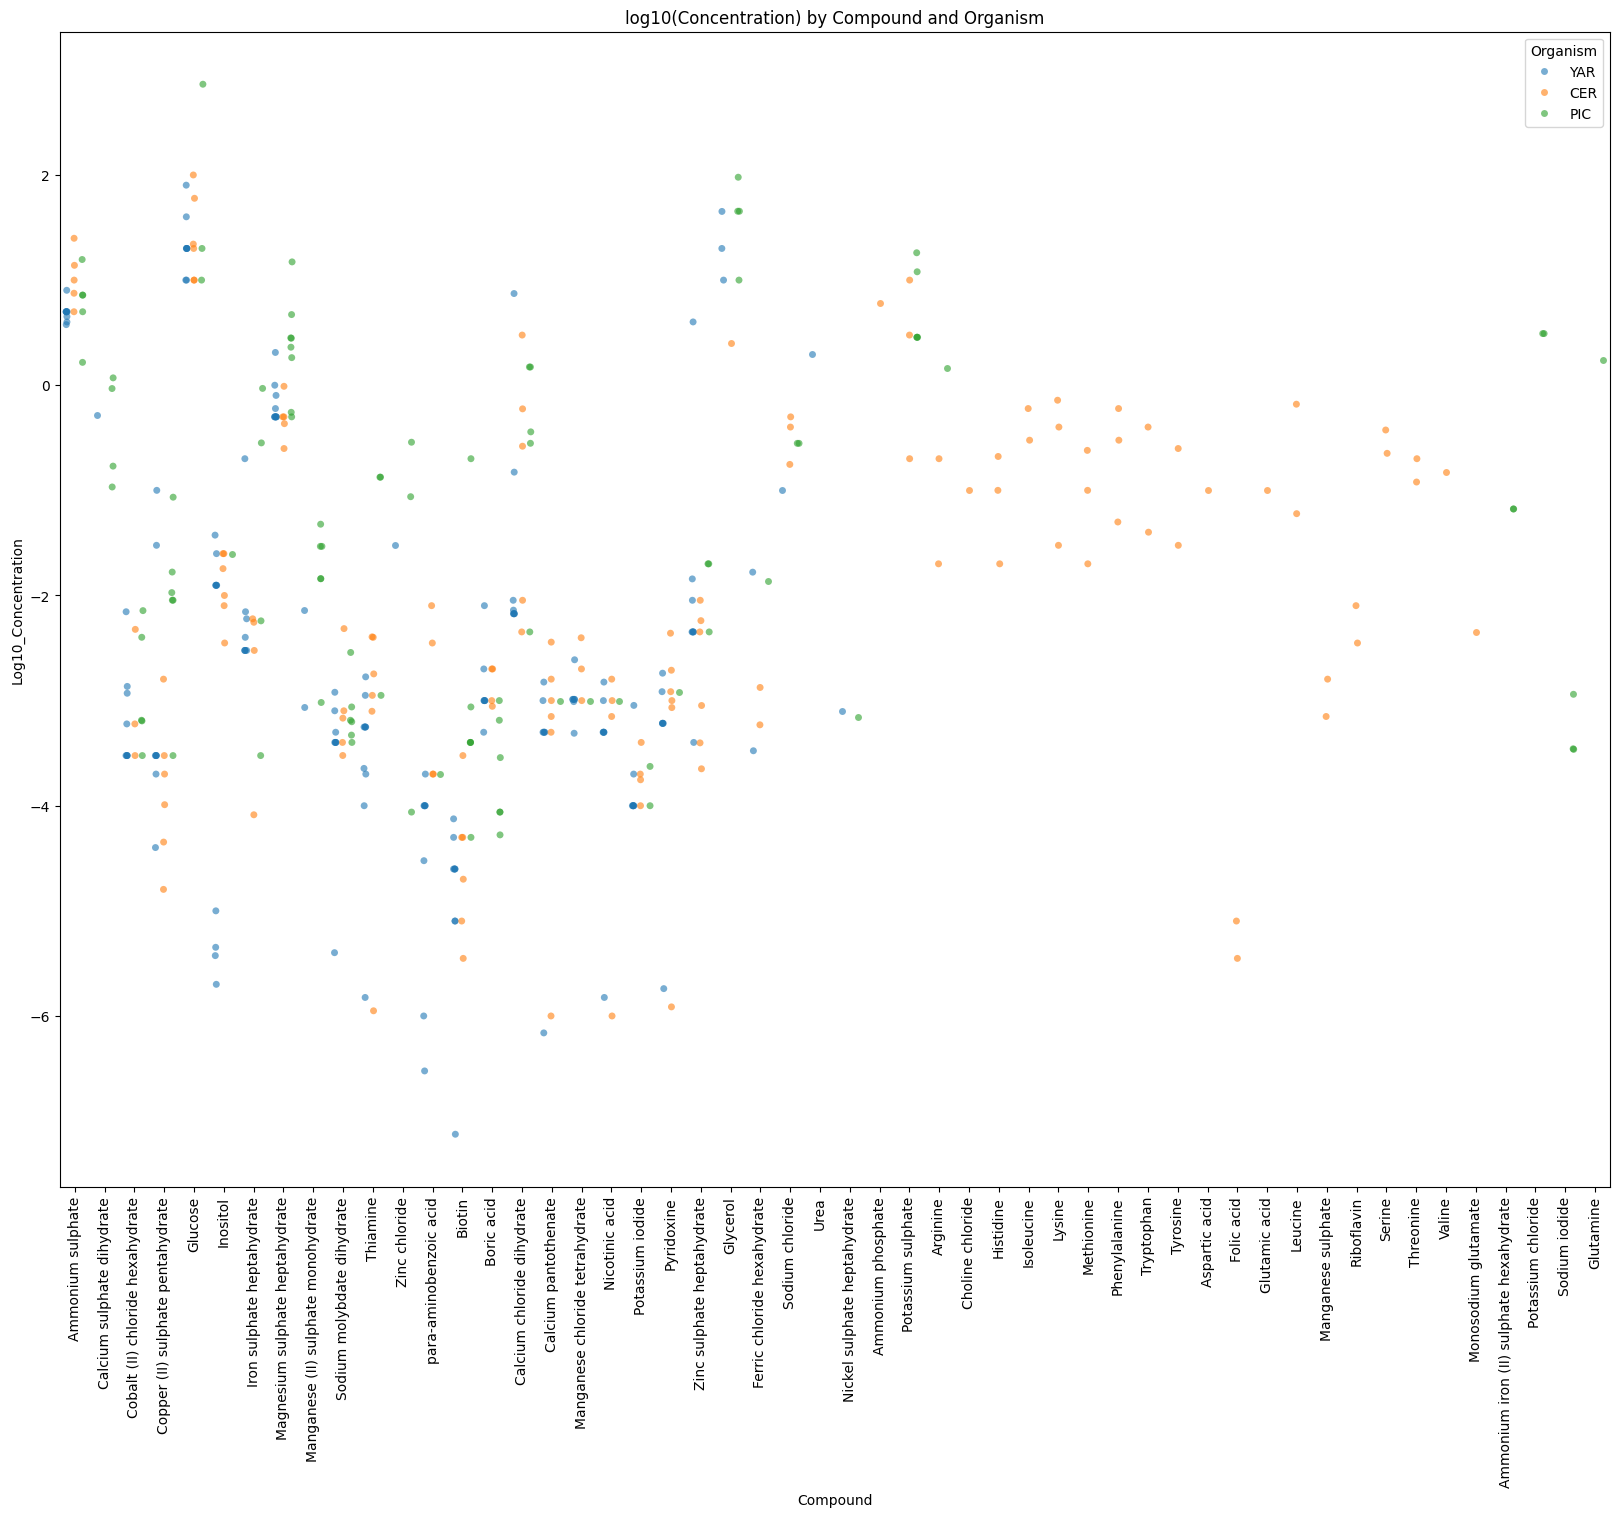

In [56]:
plt.figure(figsize=(20, 15))
sns.stripplot(data=df_long[df_long['Log10_Concentration'] > -10],
              x='Compound', y='Log10_Concentration', hue='Organism',
              dodge=True, alpha=0.6, jitter=True)

plt.xticks(rotation=90)
plt.title('log10(Concentration) by Compound and Organism')

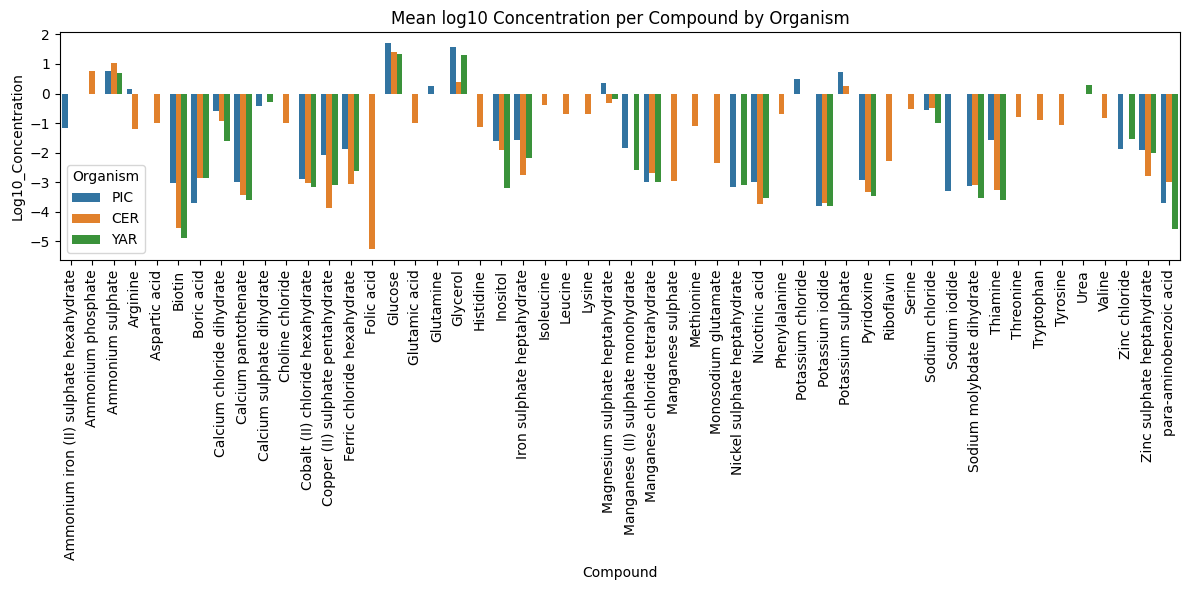

In [41]:
# Take the average log concentration per compound per organism
avg_df = df_long[df_long['Log10_Concentration'] > -10].groupby(['Compound', 'Organism'])['Log10_Concentration'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_df, x='Compound', y='Log10_Concentration', hue='Organism')
plt.xticks(rotation=90)
plt.title("Mean log10 Concentration per Compound by Organism")
plt.tight_layout()
plt.show()

In [ ]:
yar_cols = [col for col in df_log.columns if '_YAR' in col]
yar_df = df_log[yar_cols].copy()

# Add the compound names as a column if needed
yar_df['Compound'] = yar_df.index

yar_melt = yar_df.melt(id_vars='Compound', var_name='Sample', value_name='Value')

plt.figure(figsize=(14,6))
sns.stripplot(data=yar_melt, x='Compound', y='Value', jitter=True)
plt.xticks(rotation=90)
plt.title('Yarrowia Compound Concentrations (log10 transformed)')
plt.tight_layout()
plt.show()

In [ ]:

yar_cols = [col for col in df_log.columns if '_YAR' in col]
cer_cols = [col for col in df_log.columns if '_CER' in col]
pic_cols = [col for col in df_log.columns if '_PIC' in col]

# Melt to long format for each organism
yar_long = df_log[yar_cols].copy()
yar_long['Organism'] = 'YAR'
yar_long = yar_long.melt(id_vars='Organism', var_name='Compound', value_name='Value')

cer_long = df_log[cer_cols].copy()
cer_long['Organism'] = 'CER'
cer_long = cer_long.melt(id_vars='Organism', var_name='Compound', value_name='Value')

pic_long = df_log[pic_cols].copy()
pic_long['Organism'] = 'PIC'
pic_long = pic_long.melt(id_vars='Organism', var_name='Compound', value_name='Value')

# Concatenate all long dataframes
df_long = pd.concat([yar_long, cer_long, pic_long], ignore_index=True)

# Optional: clean up compound names if you want, e.g. remove organism suffix:
df_long['Compound'] = df_long['Compound'].str.replace(r'_\w+$', '', regex=True)

# Plot violinplot with seaborn
plt.figure(figsize=(16,6))
sns.violinplot(data=df_long, x='Compound', y='Value', hue='Organism', split=True, inner='quartile')
plt.xticks(rotation=90)
plt.title('Compound Concentrations by Organism (log10 transformed)')
plt.tight_layout()
plt.show()

In [ ]:
#sns.pairplot(df_t)
#sns.pairplot(df)

In [ ]:
'''
subset_cols = ['Exp_1', 'Exp_2', 'Exp_3', 'Exp_4']
sns.pairplot(df[subset_cols])
plt.show()
'''

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(full_df), 
                         columns=full_df.columns,
                         index=full_df.index)

yar_df_scaled = pd.DataFrame(scaler.fit_transform(yar_df),
                            columns=yar_df.columns,
                            index=yar_df.index)

cer_df_scaled = pd.DataFrame(scaler.fit_transform(cer_df),
                            columns=cer_df.columns,
                            index=cer_df.index) 

pic_df_scaled = pd.DataFrame(scaler.fit_transform(pic_df),
                            columns=pic_df.columns,
                            index=pic_df.index) 


In [ ]:
# metric as euclidean 
sns.clustermap(df_scaled, cmap='vlag', metric='euclidean', figsize=(10, 8))

In [ ]:
# metric as correlation
sns.clustermap(df_scaled, cmap='vlag', metric='correlation', figsize=(10, 8))

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Transpose to analyze experiments (columns become rows)
pca = PCA(n_components=5)  # Get 5 PCs so you can plot variance later
pca_result = pca.fit_transform(df_scaled.T)

# Scatter plot for first 2 PCs
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA of Experiments")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Label each experiment (column name)
for i, name in enumerate(df_scaled.columns):
    plt.text(pca_result[i, 0], pca_result[i, 1], str(name), fontsize=8)

plt.tight_layout()
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Bar plot of variance explained by first 5 PCs
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), pca.explained_variance_ratio_, tick_label=[f"PC{i}" for i in range(1, 6)])
plt.title("PCA - Explained Variance")
plt.ylabel("Variance Ratio")
plt.show()


In [ ]:
# this was unsuccessful as most clusters only had 1 sample. but might be useful when splitting experiments

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)  # Try 3–6
labels = kmeans.fit_predict(df_scaled)

# Add to your dataframe
df_scaled['Cluster'] = labels
import seaborn as sns
sns.pairplot(df_scaled, hue='Cluster')
plt.show()


In [ ]:
# some adjustments so every compound shows 
g = sns.clustermap(df_scaled.drop('Cluster', axis=1), row_colors=df_scaled['Cluster'].map({0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}))

# weirdly have to reorder label like this to get it to show every compound name from above
reordered_labels = g.data.index[g.dendrogram_row.reordered_ind]

g.ax_heatmap.set_yticks(np.arange(len(reordered_labels)))
g.ax_heatmap.set_yticklabels(reordered_labels, rotation = 0)
#g.fig.set_size_inches(18,20)

In [ ]:
df_scaled.groupby('Cluster').mean()

# results below for the whole media set can be interpreted as:
# cluster 0 mostly around -0.1 baseline/weak response
# cluster 1 has some strong positive responses for certain conditions, looking above we can see a few pichia and yarrowia experiments light up in response to glucose
# cluster 2 has some strong positives in different sections to cluster 1, and above we can see there is a response to glycerel
# cluster 3 This seems to do with phosphoric acid from pichia experiments 1c and 1d 

In [ ]:
compound_clusters = df_scaled['Cluster']
compound_clusters.value_counts()


In [ ]:
compounds_by_cluster = df.copy()
compounds_by_cluster['Cluster'] = compound_clusters


In [ ]:
cluster_means = compounds_by_cluster.groupby('Cluster').mean()
cluster_means.T.plot(kind='bar', figsize=(14, 6), title="Mean Response per Condition by Cluster")


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_scaled.drop('Cluster', axis=1))
    score = silhouette_score(df_scaled.drop('Cluster', axis=1), labels)
    scores.append(score)

plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()


In [ ]:
outliers = df_scaled[df_scaled['Cluster'] != 0]
print(outliers.index)


In [ ]:
import matplotlib.pyplot as plt

# Plot the outlier compounds
df.loc[outliers.index].T.plot(figsize=(14, 6), title="Outlier Compounds", legend=True)
plt.ylabel("Response")
plt.show()


In [ ]:
ax = df.loc[outliers.index].T.plot(figsize=(20, 6), title="Outlier Compounds", legend=True)

# Ensure every point is labeled on the x-axis
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90)

plt.ylabel("Response")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation between Experiments")
plt.show()


In [ ]:
# this is good but is missing many labels
df_t = df.T

plt.figure(figsize=(14, 10))
sns.heatmap(df_t.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation between Media Components")
plt.show()

In [ ]:
import numpy as np

ratio_matrix = {}

columns = df_t.columns
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i < j:
            ratio = df_t[col1] / (df_t[col2] + 1e-8)  # avoid divide-by-zero
            std_ratio = np.std(ratio)
            ratio_matrix[(col1, col2)] = std_ratio

# Find pairs with lowest std dev of ratio
sorted_ratios = sorted(ratio_matrix.items(), key=lambda x: x[1])
for (comp1, comp2), std in sorted_ratios[:10]:  # show top 10 stable ratios
    print(f"{comp1} / {comp2} --> std dev of ratio: {std:.4f}")


In [ ]:
# this yields same results whether scaled or not
import itertools

ratios = {}
cols = df_t.columns  # Now each column is a media component

for col1, col2 in itertools.combinations(cols, 2):
    ratio = df_t[col1] / df_t[col2]
    
    # Optional: skip if too many NaNs or Infs
    if ratio.isnull().mean() > 0.2 or np.isinf(ratio).mean() > 0.2:
        continue
    '''
    if ratio.isnull().all():  # avoid divide-by-zero columns
        continue
    '''
    std_dev = ratio.std(skipna=True)
    ratios[(col1, col2)] = std_dev

stable_ratios = sorted(ratios.items(), key=lambda x: x[1])
for (comp1, comp2), std in stable_ratios[:10]:
    print(f"{comp1} / {comp2} --> std dev: {std:.4f}")



In [ ]:
#this is a template to create a heatmap of ratio similarity. It still needs to be adjusted to be useful as many 0 values exists and the labels don't indicate every compound
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to square matrix
ratio_df = pd.DataFrame(index=cols, columns=cols, dtype=float)
for (col1, col2), std in ratios.items():
    ratio_df.loc[col1, col2] = std
    ratio_df.loc[col2, col1] = std  # symmetric

plt.figure(figsize=(10, 8))
sns.heatmap(ratio_df, cmap="viridis", annot=False)
plt.title("Standard Deviation of Component Ratios Across Experiments")
plt.show()


Below are extras I generated from chatGPT. Generally to try and fix or improve things above

In [ ]:
# for making mean = 0; std = 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_t_scaled = pd.DataFrame(scaler.fit_transform(df_t), 
                           index=df_t.index, 
                           columns=df_t.columns)


In [ ]:
# for bringing everything to [0,1]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_t_scaled = pd.DataFrame(scaler.fit_transform(df_t), 
                           index=df_t.index, 
                           columns=df_t.columns)


In [ ]:
import itertools
import numpy as np

ratios = {}
cols = df_t_scaled.columns

for col1, col2 in itertools.combinations(cols, 2):
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = df_t_scaled[col1] / df_t_scaled[col2]
        if ratio.isnull().all() or np.isinf(ratio).all():
            continue
        std_dev = ratio.replace([np.inf, -np.inf], np.nan).dropna().std()
        ratios[(col1, col2)] = std_dev

stable_ratios = sorted(ratios.items(), key=lambda x: x[1])


In [ ]:
for (comp1, comp2), std in stable_ratios[:10]:
    print(f"{comp1} / {comp2} --> std dev: {std:.4f}")


In [ ]:
df_filtered = df_t_scaled.loc[:, (df_t_scaled != 0).any()]


In [ ]:
ratio = df_t_scaled[col1] / df_t_scaled[col2]
valid = ratio.replace([np.inf, -np.inf], np.nan).dropna()
if len(valid) >= 5:  # Only trust stable ratios with enough data points
    std_dev = valid.std()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ratio_df = pd.DataFrame(index=cols, columns=cols, dtype=float)
for (col1, col2), std in ratios.items():
    ratio_df.loc[col1, col2] = std
    ratio_df.loc[col2, col1] = std  # fill symmetry

sns.heatmap(ratio_df, cmap="viridis", square=True)
plt.title("Std Dev of Compound Ratios")
plt.show()


In [ ]:
compound_names = df_t_scaled.columns
n = len(compound_names)

# Initialize matrix
std_matrix = pd.DataFrame(np.nan, index=compound_names, columns=compound_names)

# Fill it
for i in range(n):
    for j in range(i+1, n):
        c1, c2 = compound_names[i], compound_names[j]
        ratio = df_t_scaled[c1] / df_t_scaled[c2]
        ratio = ratio.replace([np.inf, -np.inf], np.nan).dropna()
        if len(ratio) >= 5:
            std = ratio.std()
            std_matrix.loc[c1, c2] = std
            std_matrix.loc[c2, c1] = std  # symmetry


In [ ]:
from sklearn.metrics import pairwise_distances

# Replace NaNs with high values (i.e., very dissimilar)
distance_matrix = std_matrix.fillna(std_matrix.max().max())
# Clip very large outliers if needed
distance_matrix = np.clip(distance_matrix, 0, 10)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# You can adjust number of clusters or set a distance threshold
clustering = AgglomerativeClustering(
    metric='precomputed',
    linkage='average',
    distance_threshold=1.0,  # try tuning this
    n_clusters=None
)

labels = clustering.fit_predict(distance_matrix)

# Assign clusters to compounds
compound_clusters = pd.DataFrame({'Compound': compound_names, 'Cluster': labels})


In [ ]:
# View clusters
for cluster_id, group in compound_clusters.groupby("Cluster"):
    print(f"Cluster {cluster_id}:")
    print(group["Compound"].tolist())
    print()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from scipy.spatial.distance import squareform

# Replace NaNs with large values if not done already
distance_matrix_clean = distance_matrix.fillna(distance_matrix.max().max())
# Force diagonal to 0
np.fill_diagonal(distance_matrix_clean.values, 0)
# Condense
condensed_dist = squareform(distance_matrix_clean.values)


In [ ]:
linked = linkage(condensed_dist, method='average')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=distance_matrix_clean.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering of Compounds")
plt.xlabel("Compound")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()
